In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('consulta12439672.csv', sep=';')
df.head()

,pesquisa_id,ano,unidades_federativas_id,unidade_federativa_nome,ambito,cargos_id,cargo,tipo_id,tipo,turno,...,data_referencia,margem_mais,margem_menos,contratante,num_registro,orgao_registro,qtd_entrevistas,partidos_id,partido,cidade
0,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,33,PSDB,NaN
1,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,36,Psol,NaN
2,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,1,NaN,NaN
3,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,9,PC do B,NaN
4,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,45,Rede,NaN


In [4]:
df.shape

(83, 32)

In [5]:
primeiro_turno = df[df.turno == 1]
primeiro_turno.shape

(55, 32)

In [6]:
primeiro_turno.dtypes

pesquisa_id                  int64
ano                          int64
unidades_federativas_id      int64
unidade_federativa_nome     object
ambito                      object
cargos_id                    int64
cargo                       object
tipo_id                      int64
tipo                        object
turno                        int64
data_pesquisa               object
instituto_id                 int64
instituto                   object
voto_tipo                   object
cenario_id                   int64
cenario_descricao           object
candidatos_id                int64
candidato_partido           object
candidato                   object
ano_default                 object
condicao                     int64
percentual                 float64
data_referencia             object
margem_mais                float64
margem_menos               float64
contratante                 object
num_registro                object
orgao_registro              object
qtd_entrevistas     

In [7]:
primeiro_turno.cenario_descricao.head()

0    cenário 1 estimulado - 1º turno
1    cenário 1 estimulado - 1º turno
2    cenário 1 estimulado - 1º turno
3    cenário 1 estimulado - 1º turno
4    cenário 1 estimulado - 1º turno
Name: cenario_descricao, dtype: object

In [8]:
cenario_1 = primeiro_turno[primeiro_turno.cenario_descricao == 'cenário 1 estimulado - 1º turno'] # sem candidato do PT 
cenario_2 = primeiro_turno[primeiro_turno.cenario_descricao == 'cenário 2 estimulado - 1º turno'] # com Haddad como candidato do PT 
cenario_3 = primeiro_turno[primeiro_turno.cenario_descricao == 'cenário 3 estimulado - 1º turno'] # com Lula candidato 
cenario_4 = primeiro_turno[primeiro_turno.cenario_descricao == 'cenário 4 estimulado - 1º turno'] # com Haddad apoiado por Lula 

In [9]:
cenario_1.head()

,pesquisa_id,ano,unidades_federativas_id,unidade_federativa_nome,ambito,cargos_id,cargo,tipo_id,tipo,turno,...,data_referencia,margem_mais,margem_menos,contratante,num_registro,orgao_registro,qtd_entrevistas,partidos_id,partido,cidade
0,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,33,PSDB,NaN
1,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,36,Psol,NaN
2,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,1,NaN,NaN
3,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,9,PC do B,NaN
4,7991,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,30jul-1ago,3.2,3.2,XP Investimentos,BR-06820/2018,TSE,1000,45,Rede,NaN


In [12]:
cenario_1.groupby('candidato').percentual

In [54]:
df1 = cenario_1[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()
df1

,index,candidato,percentual
0,10,branco / nulo / nenhum,29.0
1,7,Jair Bolsonaro,22.0
2,4,Marina Silva,11.0
3,0,Geraldo Alckmin,10.0
4,8,Ciro Gomes,10.0
5,6,não sabe,6.0
6,5,Alvaro Dias,5.0
7,9,Henrique Meirelles,3.0
8,3,Manuela D'Ávila,2.0
9,1,Guilherme Boulos,1.0


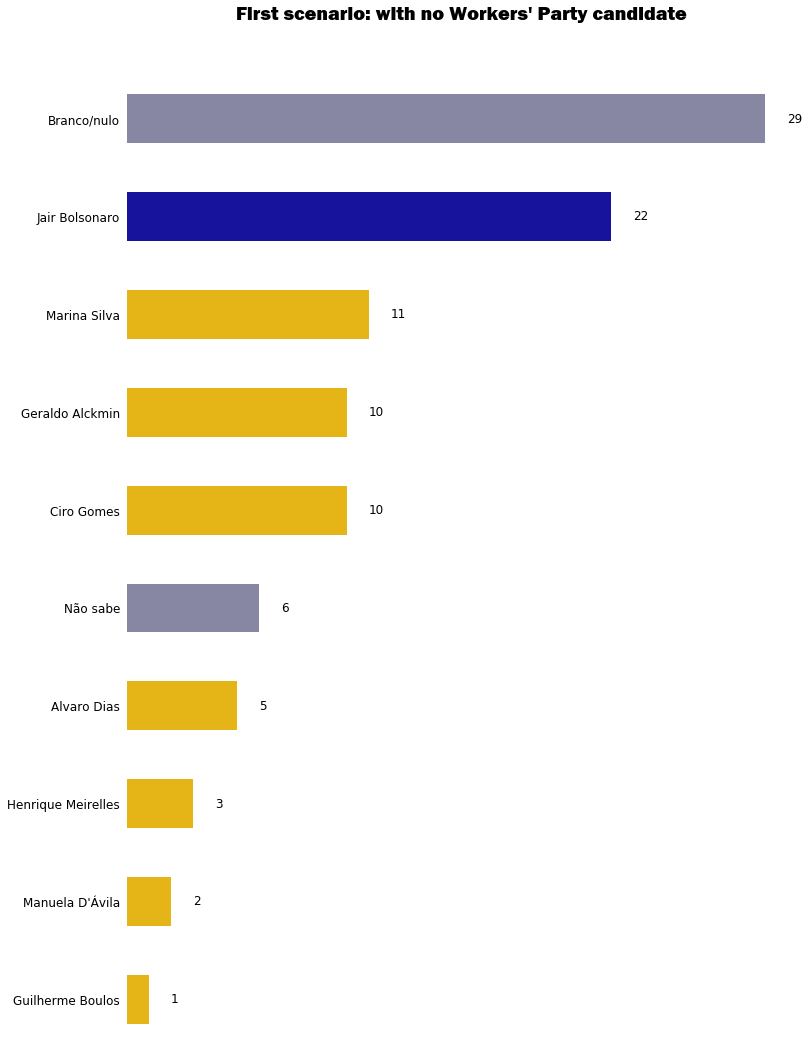

In [95]:
colors = ['#E5B417', '#E5B417', '#E5B417', '#E5B417', '#8787A3', '#E5B417', '#E5B417', '#E5B417', '#17139C', '#8787A3']


ax = df1.percentual.head(10).sort_values(ascending=True).plot(kind='barh', y='candidato', color=colors, figsize=(12,18))

ax.set_title('First scenario: with no Workers\' Party candidate', pad=50)

ax.title.set_fontsize(20)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
plt.tick_params(labelbottom=False)

#ax.grid(True, axis='x', color='#FEBFB3', linestyle='--', linewidth=0.8)
#ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

for i, bar in enumerate(ax.patches):
    #print(i)
    value = int(round(bar.get_width()))
    x_position = bar.get_width() + 1 # +1 moves the text to the right
    y_position = i
    ax.text(x_position, y_position, value, va='center')
    
labels = ['Guilherme Boulos', 'Manuela D\'Ávila', 'Henrique Meirelles', 'Alvaro Dias', 'Não sabe', 'Ciro Gomes', 'Geraldo Alckmin', 'Marina Silva', 'Jair Bolsonaro', 'Branco/nulo']
ax.set_yticklabels(labels)

plt.savefig("first-scenario.pdf")

In [43]:
df2 = cenario_2[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()
df2

,index,candidato,percentual
0,21,branco / nulo / nenhum,29.0
1,22,Jair Bolsonaro,22.0
2,11,Marina Silva,11.0
3,12,Ciro Gomes,10.0
4,20,Geraldo Alckmin,10.0
5,13,não sabe,5.0
6,15,Alvaro Dias,5.0
7,14,Fernando Haddad,2.0
8,16,Henrique Meirelles,2.0
9,17,Manuela D'Ávila,2.0


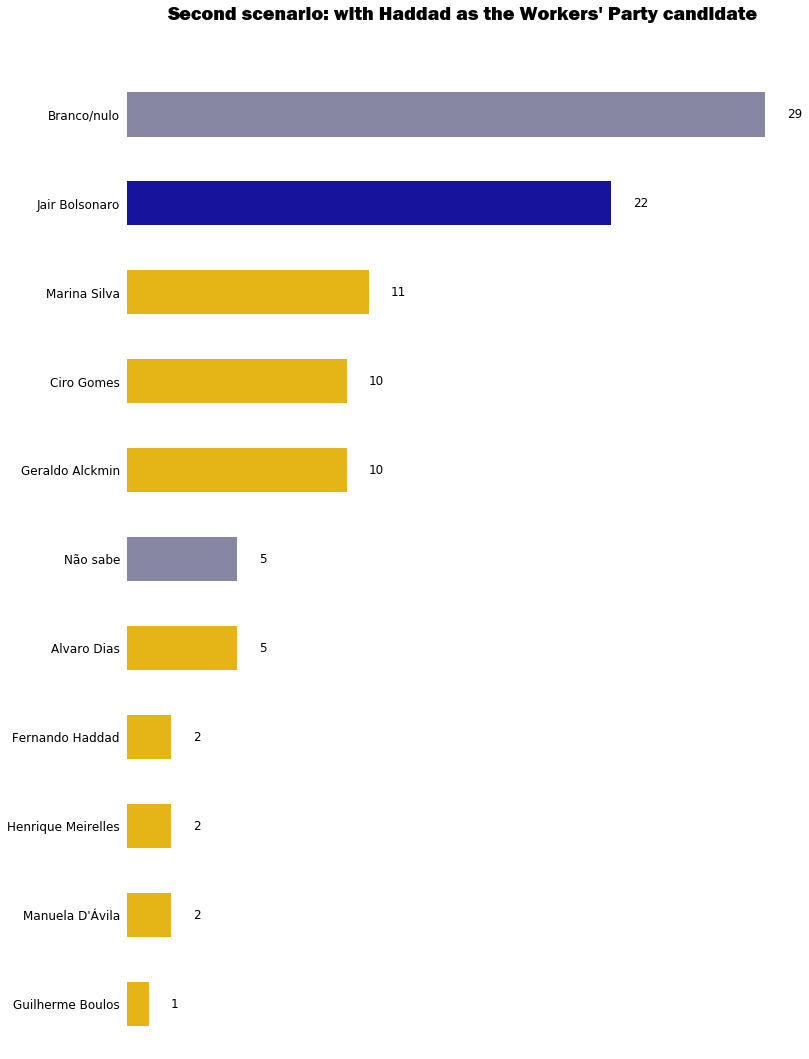

In [94]:
colors = ['#E5B417', '#E5B417', '#E5B417', '#E5B417', '#E5B417', '#8787A3', '#E5B417', '#E5B417', '#E5B417', '#17139C', '#8787A3']


ax = df2.percentual.head(11).sort_values(ascending=True).plot(kind='barh', y='candidato', color=colors, figsize=(12,18))

ax.set_title('Second scenario: with Haddad as the Workers\' Party candidate', pad=50)

ax.title.set_fontsize(20)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
plt.tick_params(labelbottom=False)

#ax.grid(True, axis='x', color='#FEBFB3', linestyle='--', linewidth=0.8)
#ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

for i, bar in enumerate(ax.patches):
    #print(i)
    value = int(round(bar.get_width()))
    x_position = bar.get_width() + 1 # +1 moves the text to the right
    y_position = i
    ax.text(x_position, y_position, value, va='center')
    
labels = ['Guilherme Boulos', 'Manuela D\'Ávila', 'Henrique Meirelles', 'Fernando Haddad', 'Alvaro Dias', 'Não sabe', 'Geraldo Alckmin', 'Ciro Gomes', 'Marina Silva', 'Jair Bolsonaro', 'Branco/nulo']
ax.set_yticklabels(labels)

plt.savefig("second-scenario.pdf")

In [48]:
df3 = cenario_3[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()
df3

,index,candidato,percentual
0,31,Lula,31.0
1,30,Jair Bolsonaro,19.0
2,29,branco / nulo / nenhum,15.0
3,27,Geraldo Alckmin,9.0
4,26,Marina Silva,8.0
5,33,Ciro Gomes,7.0
6,34,Alvaro Dias,4.0
7,35,não sabe,3.0
8,28,Henrique Meirelles,2.0
9,23,Guilherme Boulos,1.0


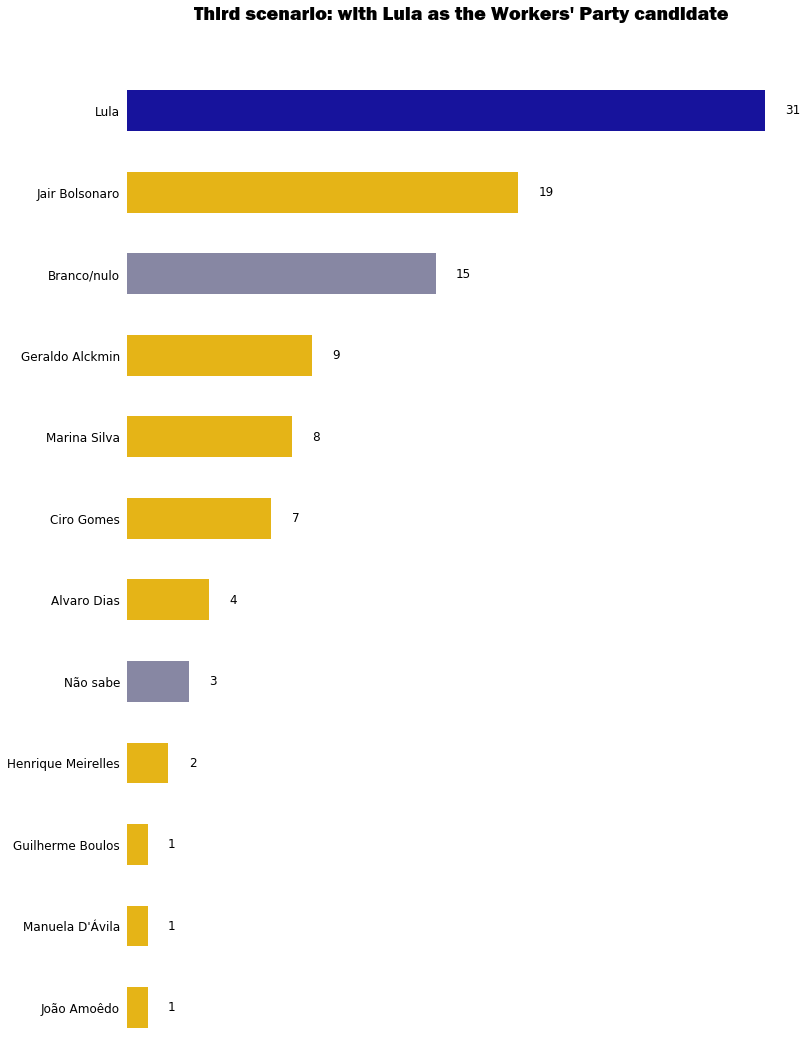

In [96]:
colors = ['#E5B417', '#E5B417', '#E5B417', '#E5B417', '#8787A3', '#E5B417', '#E5B417', '#E5B417', '#E5B417', '#8787A3', '#E5B417', '#17139C']


ax = df3.percentual.head(12).sort_values(ascending=True).plot(kind='barh', y='candidato', color=colors, figsize=(12,18))

ax.set_title('Third scenario: with Lula as the Workers\' Party candidate', pad=50)

ax.title.set_fontsize(20)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
plt.tick_params(labelbottom=False)

#ax.grid(True, axis='x', color='#FEBFB3', linestyle='--', linewidth=0.8)
#ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

for i, bar in enumerate(ax.patches):
    #print(i)
    value = int(round(bar.get_width()))
    x_position = bar.get_width() + 1 # +1 moves the text to the right
    y_position = i
    ax.text(x_position, y_position, value, va='center')
    
labels = ['João Amoêdo', 'Manuela D\'Ávila', 'Guilherme Boulos', 'Henrique Meirelles', 'Não sabe', 'Alvaro Dias', 'Ciro Gomes', 'Marina Silva', 'Geraldo Alckmin', 'Branco/nulo', 'Jair Bolsonaro', 'Lula']
ax.set_yticklabels(labels)

plt.savefig("third-scenario.pdf")

In [50]:
df4 = cenario_4[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()
df4

,index,candidato,percentual
0,37,branco / nulo / nenhum,27.0
1,38,Jair Bolsonaro,20.0
2,39,Haddad apoiado por Lula,13.0
3,40,Marina Silva,9.0
4,44,Geraldo Alckmin,9.0
5,41,Ciro Gomes,8.0
6,36,não sabe,4.0
7,45,Alvaro Dias,4.0
8,42,Manuela D'Ávila,2.0
9,46,Henrique Meirelles,2.0


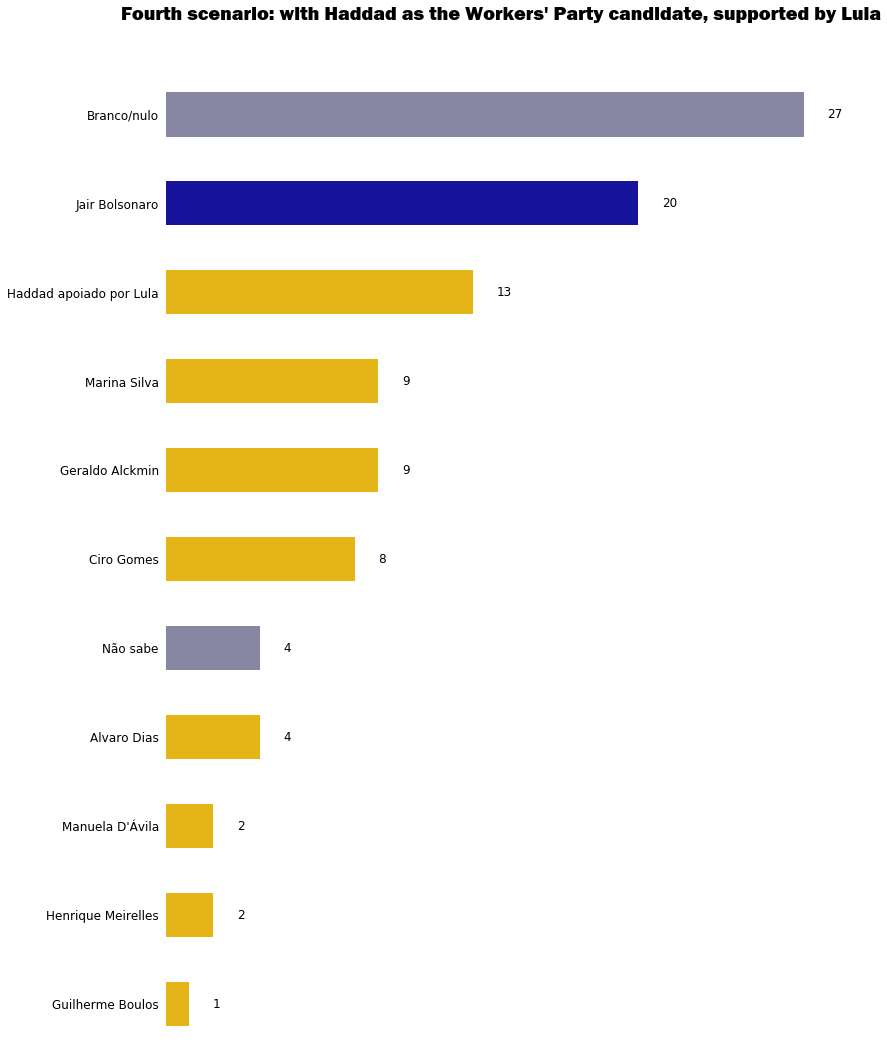

In [97]:
colors = ['#E5B417', '#E5B417', '#E5B417', '#E5B417', '#8787A3', '#E5B417', '#E5B417', '#E5B417', '#E5B417', '#17139C', '#8787A3']


ax = df4.percentual.head(11).sort_values(ascending=True).plot(kind='barh', y='candidato', color=colors, figsize=(12,18))

ax.set_title('Fourth scenario: with Haddad as the Workers\' Party candidate, supported by Lula', pad=50)

ax.title.set_fontsize(20)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
plt.tick_params(labelbottom=False)

#ax.grid(False, axis='x', color='#FEBFB3', linestyle='--', linewidth=0.8)
#ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

for i, bar in enumerate(ax.patches):
    #print(i)
    value = int(round(bar.get_width()))
    x_position = bar.get_width() + 1 # +1 moves the text to the right
    y_position = i
    ax.text(x_position, y_position, value, va='center')
    
labels = ['Guilherme Boulos', 'Henrique Meirelles', 'Manuela D\'Ávila', 'Alvaro Dias', 'Não sabe', 'Ciro Gomes', 'Geraldo Alckmin', 'Marina Silva', 'Haddad apoiado por Lula', 'Jair Bolsonaro', 'Branco/nulo']
ax.set_yticklabels(labels)

plt.savefig("fourth-scenario.pdf")

In [3]:
df_recent = pd.read_csv('consulta15146310.csv', sep=';')
df_recent.head()

,pesquisa_id,ano,unidades_federativas_id,unidade_federativa_nome,ambito,cargos_id,cargo,tipo_id,tipo,turno,...,data_referencia,margem_mais,margem_menos,contratante,num_registro,orgao_registro,qtd_entrevistas,partidos_id,partido,cidade
0,8112,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,20-21.ago.2018,2.0,2.0,GLOBO / FOLHA,BR-04023/2018,TSE,8300,39,PT,NaN
1,8112,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,20-21.ago.2018,2.0,2.0,GLOBO / FOLHA,BR-04023/2018,TSE,8300,35,PSL,NaN
2,8112,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,20-21.ago.2018,2.0,2.0,GLOBO / FOLHA,BR-04023/2018,TSE,8300,45,Rede,NaN
3,8112,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,20-21.ago.2018,2.0,2.0,GLOBO / FOLHA,BR-04023/2018,TSE,8300,33,PSDB,NaN
4,8112,2018,6,BRASIL,BR,3,Presidente,2,Estimulada,1,...,20-21.ago.2018,2.0,2.0,GLOBO / FOLHA,BR-04023/2018,TSE,8300,10,PDT,NaN


In [4]:
df_recent.dtypes

pesquisa_id                  int64
ano                          int64
unidades_federativas_id      int64
unidade_federativa_nome     object
ambito                      object
cargos_id                    int64
cargo                       object
tipo_id                      int64
tipo                        object
turno                        int64
data_pesquisa               object
instituto_id                 int64
instituto                   object
voto_tipo                   object
cenario_id                   int64
cenario_descricao           object
candidatos_id                int64
candidato_partido           object
candidato                   object
ano_default                 object
condicao                     int64
percentual                 float64
data_referencia             object
margem_mais                float64
margem_menos               float64
contratante                 object
num_registro                object
orgao_registro              object
qtd_entrevistas     

In [8]:
df_recent.cenario_descricao.value_counts()

rejeição                           17
cenário 2 estimulada - 1º turno    15
cenário 1 estimulada - 1º turno    15
Name: cenario_descricao, dtype: int64

In [9]:
cenario1 = df_recent[df_recent.cenario_descricao == 'cenário 1 estimulada - 1º turno']
cenario2 = df_recent[df_recent.cenario_descricao == 'cenário 2 estimulada - 1º turno']

In [10]:
df_recent.percentual.head()

0    39.0
1    19.0
2     8.0
3     6.0
4     5.0
Name: percentual, dtype: float64

In [11]:
cenario1[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()

,index,candidato,percentual
0,0,Lula,39.0
1,1,Bolsonaro,19.0
2,13,branco / nulo / nenhum,11.0
3,2,Marina,8.0
4,3,Alckmin,6.0
5,4,Ciro,5.0
6,5,Alvaro Dias,3.0
7,14,não sabe,3.0
8,6,João Amoêdo,2.0
9,7,Henrique Meirelles,1.0


In [12]:
cenario2[['candidato','percentual']].sort_values(by='percentual', ascending=False).reset_index()

,index,candidato,percentual
0,15,Bolsonaro,22.0
1,28,branco / nulo / nenhum,22.0
2,16,Marina,16.0
3,17,Ciro,10.0
4,18,Alckmin,9.0
5,29,não sabe,6.0
6,19,Alvaro Dias,4.0
7,20,Fernando Haddad,4.0
8,21,João Amoêdo,2.0
9,22,Henrique Meirelles,2.0
